<a href="https://colab.research.google.com/github/kyawtun19/airbnb/blob/main/airbnb_guest_reporting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('airbnbdata.csv')

# Data Cleaning

In [4]:
# Display data types of each column
print(data.dtypes)


Week of                  object
Buy Type                 object
Audience                 object
Audience Segment         object
Creative                 object
Creative Name            object
Size                     object
AirCover/Categories      object
Opti Test                object
Duration                 object
id                       object
Campaign                 object
Ad name                  object
Day                      object
Currency code            object
Clicks                   object
Impr.                    object
Cost                    float64
net                     float64
Views                    object
Video played to 25%      object
Video played to 50%      object
Video played to 75%      object
Video played to 100%     object
Bookings                float64
New Bookings            float64
Site Visits             float64
All Value               float64
Video Lineup             object
Ad group                 object
dtype: object


In [5]:
# Replace '#' values with 0 in specified columns
data['Bookings'].replace('#', 0, inplace=True)
data['New Bookings'].replace('#', 0, inplace=True)
data['Site Visits'].replace('#', 0, inplace=True)
data['All Value'].replace('#', 0, inplace=True)

# Display some data to verify the changes
print(data.head())


     Week of Buy Type              Audience  Audience Segment   Creative  \
0  7/17/2023      VAC             In-Market      2P In-Market   Infinity   
1  7/31/2023      VAC   Optimized Targeting          1P Guest  Edinburgh   
2  7/17/2023      VAC  High Intent Traveler  2P Custom Intent   Infinity   
3   9/4/2023      VAC      Site Retargeting          1P Guest   Infinity   
4  7/10/2023      VAC             In-Market      2P In-Market      Kyoto   

                 Creative Name    Size AirCover/Categories      Opti Test  \
0   Categories Infinity Square  Square          Categories       FTB Opti   
1  Categories Edinburgh Square  Square          Categories  Bookings Opti   
2    Categories Infinity FALSE   FALSE          Categories  Bookings Opti   
3   Categories Infinity Square  Square          Categories          FALSE   
4       Categories Kyoto FALSE   FALSE          Categories  Bookings Opti   

  Duration  ... Video played to 25% Video played to 50% Video played to 75%  \
0

In [6]:
missing_values_per_column = data.isnull().sum()
print("Missing values per column:")
print(missing_values_per_column)


Missing values per column:
Week of                    0
Buy Type                   0
Audience                   0
Audience Segment           0
Creative                   0
Creative Name              0
Size                       0
AirCover/Categories        0
Opti Test                  0
Duration                   0
id                         0
Campaign                   0
Ad name                    0
Day                        1
Currency code              1
Clicks                     1
Impr.                      1
Cost                       1
net                        1
Views                      1
Video played to 25%        1
Video played to 50%        1
Video played to 75%        1
Video played to 100%       1
Bookings                 195
New Bookings             195
Site Visits              195
All Value               1074
Video Lineup               1
Ad group                   1
dtype: int64


In [7]:
print(data.dtypes)


Week of                  object
Buy Type                 object
Audience                 object
Audience Segment         object
Creative                 object
Creative Name            object
Size                     object
AirCover/Categories      object
Opti Test                object
Duration                 object
id                       object
Campaign                 object
Ad name                  object
Day                      object
Currency code            object
Clicks                   object
Impr.                    object
Cost                    float64
net                     float64
Views                    object
Video played to 25%      object
Video played to 50%      object
Video played to 75%      object
Video played to 100%     object
Bookings                float64
New Bookings            float64
Site Visits             float64
All Value               float64
Video Lineup             object
Ad group                 object
dtype: object


In [8]:
# List of columns to be converted to numeric
cols_to_convert = [
    'Clicks', 'Impr.', 'Views', 'Video played to 25%',
    'Video played to 50%', 'Video played to 75%', 'Video played to 100%',
    'Bookings', 'New Bookings', 'Site Visits', 'All Value'
]

# Convert columns to numeric data type
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Verify the conversions
print(data.dtypes)


Week of                  object
Buy Type                 object
Audience                 object
Audience Segment         object
Creative                 object
Creative Name            object
Size                     object
AirCover/Categories      object
Opti Test                object
Duration                 object
id                       object
Campaign                 object
Ad name                  object
Day                      object
Currency code            object
Clicks                  float64
Impr.                   float64
Cost                    float64
net                     float64
Views                   float64
Video played to 25%     float64
Video played to 50%     float64
Video played to 75%     float64
Video played to 100%    float64
Bookings                float64
New Bookings            float64
Site Visits             float64
All Value               float64
Video Lineup             object
Ad group                 object
dtype: object


In [9]:
# Convert 'Week of' and 'Day' columns to datetime data type
data['Week of'] = pd.to_datetime(data['Week of'], errors='coerce')
data['Day'] = pd.to_datetime(data['Day'], errors='coerce')

# Verify the conversions
print(data.dtypes)


Week of                 datetime64[ns]
Buy Type                        object
Audience                        object
Audience Segment                object
Creative                        object
Creative Name                   object
Size                            object
AirCover/Categories             object
Opti Test                       object
Duration                        object
id                              object
Campaign                        object
Ad name                         object
Day                     datetime64[ns]
Currency code                   object
Clicks                         float64
Impr.                          float64
Cost                           float64
net                            float64
Views                          float64
Video played to 25%            float64
Video played to 50%            float64
Video played to 75%            float64
Video played to 100%           float64
Bookings                       float64
New Bookings             

In [10]:
#delete audience segment called false
data = data[data['Audience Segment'] != 'FALSE']


# Exploratory Data Analysis

In [11]:
# Get descriptive statistics for all numeric columns
desc_stats = data.describe()
print(desc_stats)


            Clicks        Impr.          Cost           net        Views  \
count  3707.000000  1130.000000   3763.000000   3763.000000  2792.000000   
mean     39.037766   415.842478    201.155714    208.699053   174.603152   
std     102.557149   283.586202    666.829492    691.835597   235.087360   
min       0.000000     0.000000      0.000000      0.000000     0.000000   
25%       1.000000   170.000000      4.645000      4.819187    14.000000   
50%       6.000000   378.000000     21.110000     21.901625    66.500000   
75%      26.000000   628.000000    109.760000    113.876000   239.000000   
max     981.000000   998.000000  12923.790000  13408.432130   994.000000   

       Video played to 25%  Video played to 50%  Video played to 75%  \
count                322.0                322.0                322.0   
mean                   0.0                  0.0                  0.0   
std                    0.0                  0.0                  0.0   
min                    0.0 

In [12]:
# Descriptive statistics by 'Audience Segment'
audience_segment_stats = data.groupby('Audience Segment').describe()
print(audience_segment_stats)

                          Clicks                                         \
                           count       mean         std  min  25%   50%   
Audience Segment                                                          
1P Guest                  1176.0  67.112245  128.473834  0.0  5.0  19.0   
2P Affinity                317.0  41.769716  106.368332  0.0  3.0   8.0   
2P Curious & Open Minded   800.0  35.680000  114.748809  0.0  0.0   3.0   
2P Custom Intent           315.0  20.155556   63.600049  0.0  1.0   3.0   
2P Hotel People            256.0  32.996094   73.674137  0.0  1.0   5.5   
2P In-Market               320.0  19.596875   54.953300  0.0  1.0   4.0   
2P Traveling Families      481.0   5.856549   14.824747  0.0  0.0   1.0   
2P Young Travelers          42.0   2.857143    5.294136  0.0  0.0   1.0   

                                        Impr.              ... Site Visits  \
                            75%    max  count        mean  ...         75%   
Audience Segment  

In [13]:
# Descriptive statistics by 'Creative Name'
creative_name_stats = data.groupby('Creative Name').describe()
print(creative_name_stats)

                                   Clicks                                      \
                                    count        mean         std  min    25%   
Creative Name                                                                   
Categories Coast FALSE              152.0   55.157895   92.947618  0.0   7.75   
Categories EIEIOH Square            121.0   14.834711   63.606387  0.0   0.00   
Categories EIEIOH Vertical          125.0   15.552000   30.768767  0.0   1.00   
Categories Edinburgh FALSE          112.0   73.178571  131.822992  0.0   5.00   
Categories Edinburgh Square         127.0   27.960630   73.555335  0.0   2.00   
Categories Edinburgh Vertical       106.0   38.358491  111.629676  0.0   2.00   
Categories FALSE FALSE               10.0  192.400000  275.847865  3.0  36.25   
Categories Floaties FALSE           139.0   17.906475   40.455360  0.0   2.00   
Categories Floaties Square          142.0    8.915493   19.132421  0.0   0.00   
Categories Floaties Vertical

In [14]:
# Descriptive statistics by 'Buy Type'
buy_type_stats = data.groupby('Buy Type').describe()
print(buy_type_stats)

          Clicks                                                     Impr.  \
           count       mean         std  min  25%  50%   75%    max  count   
Buy Type                                                                     
Instream    42.0   2.857143    5.294136  0.0  0.0  1.0   3.0   26.0   26.0   
OE         305.0  80.721311  183.962840  0.0  0.0  7.0  52.0  942.0  125.0   
VAC       3360.0  35.706250   91.411741  0.0  1.0  6.0  25.0  981.0  979.0   

                      ... Site Visits            All Value                \
                mean  ...         75%        max     count          mean   
Buy Type              ...                                                  
Instream  416.500000  ...      54.750    3329.57      24.0    918.041667   
OE        207.352000  ...    1943.445  267750.48     152.0  30977.945724   
VAC       442.445352  ...    1121.150  160630.05    2515.0   4025.781316   

                                                                   
      

# Data Slicing


# Slicing by Audience Segment

In [15]:
# Slicing data based on unique values in the 'Audience Segment' column and displaying selected columns
audience_segments = data['Audience Segment'].unique()

for segment in audience_segments:
    segment_data = data[data['Audience Segment'] == segment][['New Bookings', 'Bookings', 'Site Visits', 'All Value']]
    # Now segment_data contains data for the current audience segment with only the selected columns
    print(f"Data slice for Audience Segment: {segment}")
    print(segment_data.head()) # Display the first few rows of each slice


Data slice for Audience Segment: 2P In-Market
    New Bookings  Bookings  Site Visits  All Value
0           0.00      0.00        11.53        NaN
4           2.05      1.05       387.63     208.79
5          73.88     21.18      5202.50    8408.75
6           0.00      0.00        36.36        NaN
10          1.00      0.00        91.77     230.00
Data slice for Audience Segment: 1P Guest
    New Bookings  Bookings  Site Visits  All Value
1          32.94      3.45      1887.74    1839.56
3           3.36      0.00       429.91     508.84
7           5.40      0.33       212.37     336.00
8          23.96      6.19      1071.70    2851.44
12          0.00      0.00        34.96        NaN
Data slice for Audience Segment: 2P Custom Intent
    New Bookings  Bookings  Site Visits  All Value
2           0.00      0.00       265.10        NaN
9          26.78      3.66      1252.69    2100.18
11          8.00      2.00       487.47     490.00
13          5.60      0.74       594.35      5

# Slicing by Creative Names

In [16]:
# Slicing data based on unique values in the 'Creative Name' column
creative_names = data['Creative Name'].unique()

for name in creative_names:
    name_data = data[data['Creative Name'] == name]
    # Now name_data contains data for the current creative name
    print(f"Data slice for Creative Name: {name}")
    print(name_data.head()) # Display the first few rows of each slice


Data slice for Creative Name: Categories Infinity Square
      Week of Buy Type             Audience Audience Segment  Creative  \
0  2023-07-17      VAC            In-Market     2P In-Market  Infinity   
3  2023-09-04      VAC     Site Retargeting         1P Guest  Infinity   
7  2023-08-14      VAC  Optimized Targeting         1P Guest  Infinity   
18 2023-07-24      VAC            In-Market     2P In-Market  Infinity   
63 2023-08-14      VAC            In-Market     2P In-Market  Infinity   

                 Creative Name    Size AirCover/Categories      Opti Test  \
0   Categories Infinity Square  Square          Categories       FTB Opti   
3   Categories Infinity Square  Square          Categories          FALSE   
7   Categories Infinity Square  Square          Categories  Bookings Opti   
18  Categories Infinity Square  Square          Categories       FTB Opti   
63  Categories Infinity Square  Square          Categories       FTB Opti   

   Duration  ... Video played to 25

In [17]:
import pandas as pd

creative_names = data['Creative Name'].unique()

for name in creative_names:
    name_data = data[data['Creative Name'] == name]
    # Selecting only the four desired columns
    name_data = name_data[['New Bookings', 'Bookings', 'Site Visits', 'All Value']]

    print(f"Data slice for Creative Name: {name}")
    print(name_data.head()) # Display the first few rows of each slice


Data slice for Creative Name: Categories Infinity Square
    New Bookings  Bookings  Site Visits  All Value
0           0.00      0.00        11.53        NaN
3           3.36      0.00       429.91     508.84
7           5.40      0.33       212.37     336.00
18          0.00      0.00        18.22        NaN
63          1.00      1.00       127.37     155.00
Data slice for Creative Name: Categories Edinburgh Square
    New Bookings  Bookings  Site Visits  All Value
1          32.94      3.45      1887.74    1839.56
19         31.11      8.59      1793.07    3086.45
21         42.83      7.54      2491.73    3066.30
23        589.88    116.02     39866.01   57662.04
24         45.95      7.02      2912.56    3922.97
Data slice for Creative Name: Categories Infinity FALSE
     New Bookings  Bookings  Site Visits  All Value
2            0.00       0.0       265.10        NaN
26           1.00       0.0        73.68      43.00
40          19.71       1.0      1875.19    3360.28
70       

# Slicing by Buy Types

In [18]:
# Slicing data based on unique values in the 'Buy Type' column and displaying selected columns
buy_types = data['Buy Type'].unique()

for buy_type in buy_types:
    type_data = data[data['Buy Type'] == buy_type][['New Bookings', 'Bookings', 'Site Visits', 'All Value']]
    # Now type_data contains data for the current buy type with only the selected columns
    print(f"Data slice for Buy Type: {buy_type}")
    print(type_data.head()) # Display the first few rows of each slice


Data slice for Buy Type: VAC
   New Bookings  Bookings  Site Visits  All Value
0          0.00      0.00        11.53        NaN
1         32.94      3.45      1887.74    1839.56
2          0.00      0.00       265.10        NaN
3          3.36      0.00       429.91     508.84
4          2.05      1.05       387.63     208.79
Data slice for Buy Type: OE
     New Bookings  Bookings  Site Visits  All Value
754           0.0       0.0          1.0        NaN
755           NaN       NaN          NaN        NaN
756           NaN       NaN          NaN        NaN
757           NaN       NaN          NaN        NaN
950           NaN       NaN          NaN        NaN
Data slice for Buy Type: Instream
      New Bookings  Bookings  Site Visits  All Value
804            0.0       0.0        16.00     1050.0
1009           0.0       0.0        12.00        NaN
1045           0.0       0.0         2.00        NaN
1124           0.0       0.0         5.00        NaN
1125           1.0       0.0    

# Campaign and Creative Analysis

In [19]:
campaign_analysis = data.groupby('Campaign')[['New Bookings', 'Bookings', 'Site Visits', 'All Value']].sum().reset_index()


In [20]:
# Display the top performing campaigns for each metric
print("Top Campaigns based on New Bookings:")
print(campaign_analysis.sort_values(by='New Bookings', ascending=False).head())

print("\nTop Campaigns based on Bookings:")
print(campaign_analysis.sort_values(by='Bookings', ascending=False).head())

print("\nTop Campaigns based on Site Visits:")
print(campaign_analysis.sort_values(by='Site Visits', ascending=False).head())

print("\nTop Campaigns based on All Value:")
print(campaign_analysis.sort_values(by='All Value', ascending=False).head())

Top Campaigns based on New Bookings:
                                            Campaign  New Bookings  Bookings  \
7  US | GUE | Conversion | Video | VAC | Bookings...      36343.84   8422.37   
2  US | GUE | Conversion | Display | OX | Moments...      27085.96   4712.83   
3  US | GUE | Conversion | OLV | VAC | Cell 1 Int...      17428.53   3463.74   
5  US | GUE | Conversion | OLV | VAC | Remarketin...      13236.78   3441.36   
6  US | GUE | Conversion | Video | VAC | Bookings...       8948.05   3189.29   

   Site Visits   All Value  
7   2824862.96  3925181.39  
2   2525477.84  4708647.75  
3   1240390.47  2007048.58  
5   1427609.91  2012980.56  
6   1041179.38  1430956.41  

Top Campaigns based on Bookings:
                                            Campaign  New Bookings  Bookings  \
7  US | GUE | Conversion | Video | VAC | Bookings...      36343.84   8422.37   
2  US | GUE | Conversion | Display | OX | Moments...      27085.96   4712.83   
3  US | GUE | Conversion | OLV | V

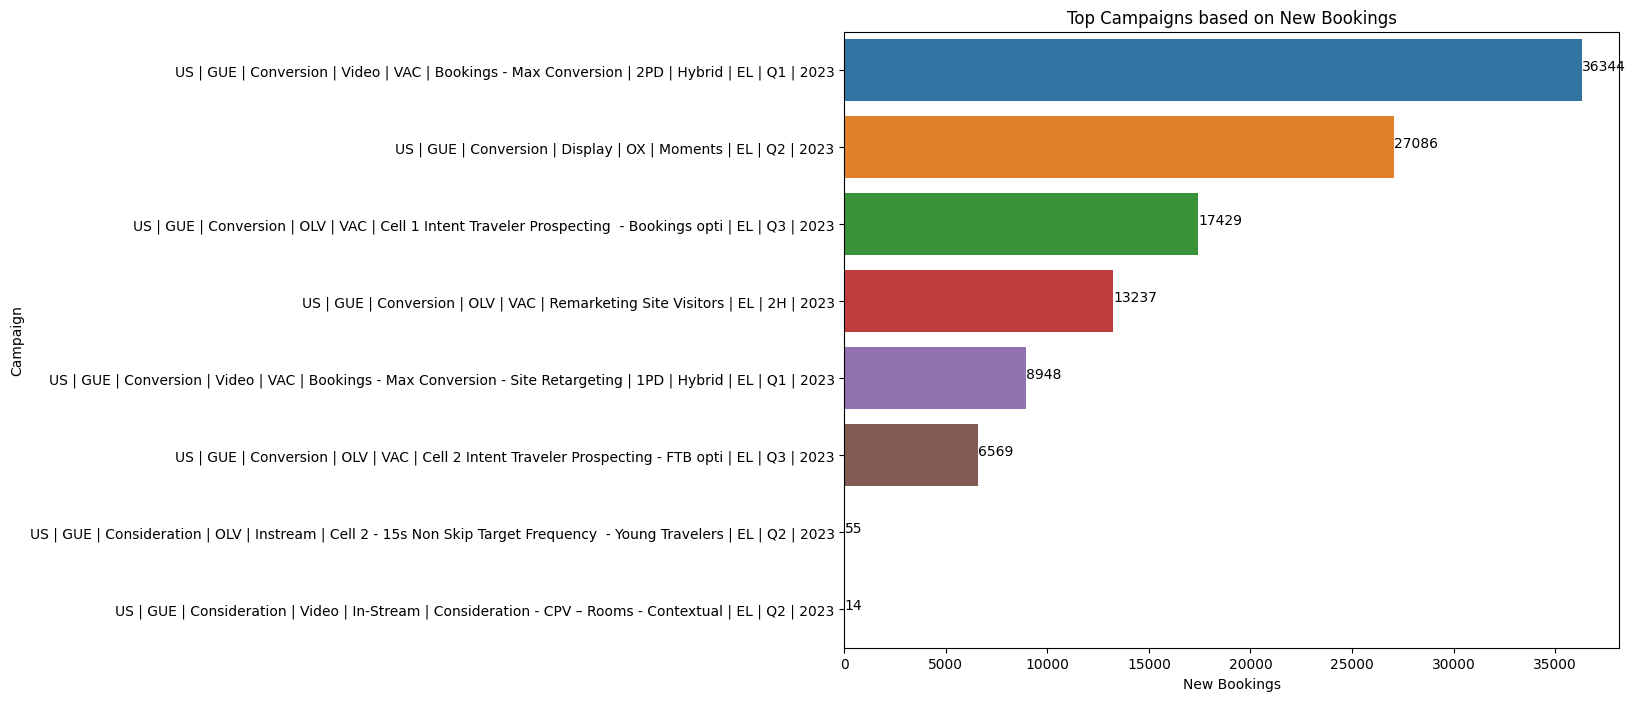

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Campaign' and calculate the sum for new bookings
campaign_analysis = data.groupby('Campaign')['New Bookings'].sum().reset_index()

# Sort the campaigns based on new bookings in descending order to get top-performing campaigns
campaign_analysis = campaign_analysis.sort_values(by='New Bookings', ascending=False)

# Visualize the data
plt.figure(figsize=(10,8))
plot = sns.barplot(x='New Bookings', y='Campaign', data=campaign_analysis.head(10))  # Adjust to display top N campaigns

plt.title('Top Campaigns based on New Bookings')
plt.xlabel('New Bookings')
plt.ylabel('Campaign')

# Adding the text labels in each bar
for index, value in enumerate(campaign_analysis['New Bookings'].head(10)):
    plt.text(value, index, f'{value:.0f}')

plt.show()


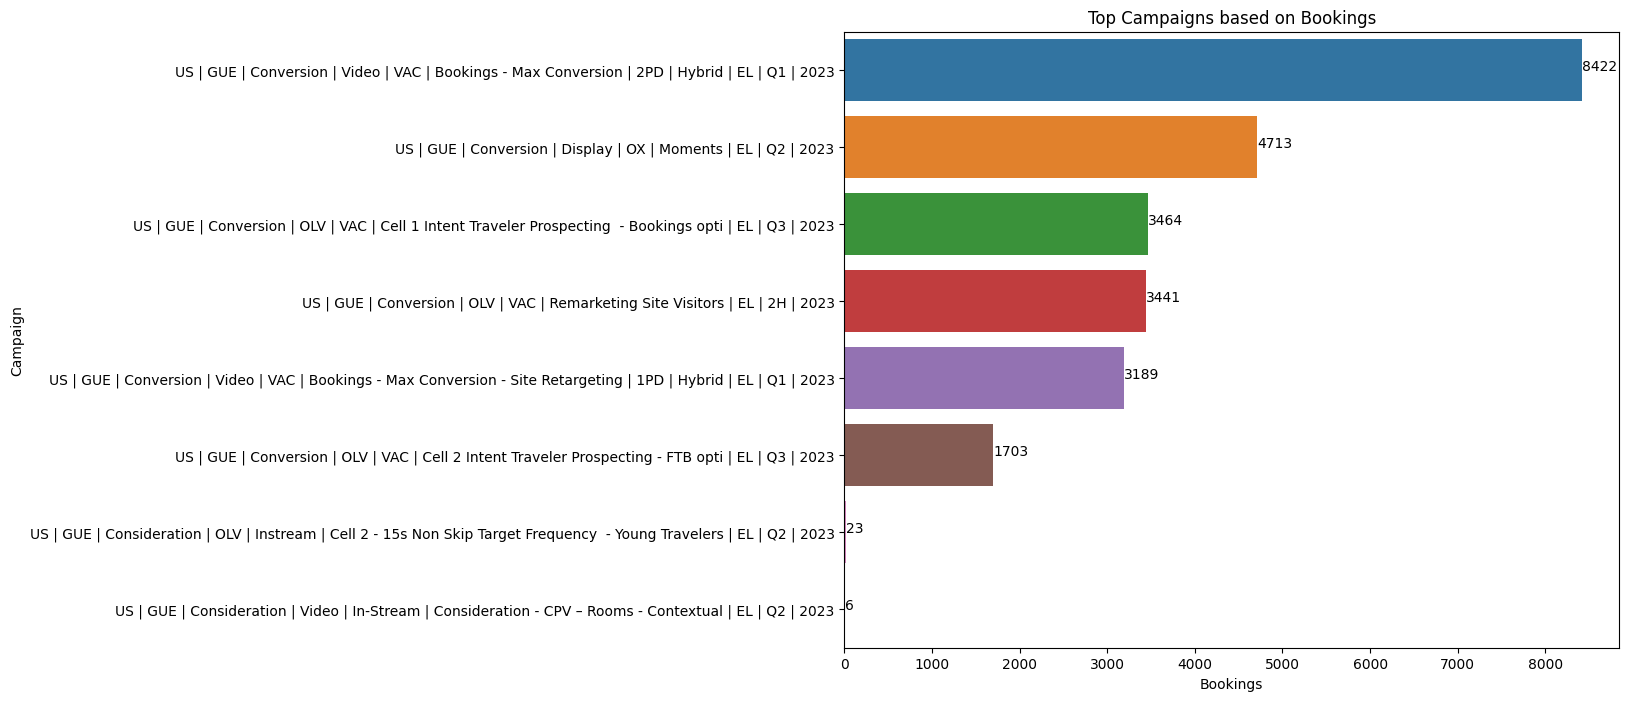

In [24]:
campaign_analysis = data.groupby('Campaign')['Bookings'].sum().reset_index()

# Sort the campaigns based on bookings in descending order to get top-performing campaigns
campaign_analysis = campaign_analysis.sort_values(by='Bookings', ascending=False)

# Visualize the data
plt.figure(figsize=(10,8))
plot = sns.barplot(x='Bookings', y='Campaign', data=campaign_analysis.head(10))  # Adjust to display top N campaigns

plt.title('Top Campaigns based on Bookings')
plt.xlabel('Bookings')
plt.ylabel('Campaign')

# Adding the text labels in each bar
for index, value in enumerate(campaign_analysis['Bookings'].head(10)):
    plt.text(value, index, f'{value:.0f}')

plt.show()

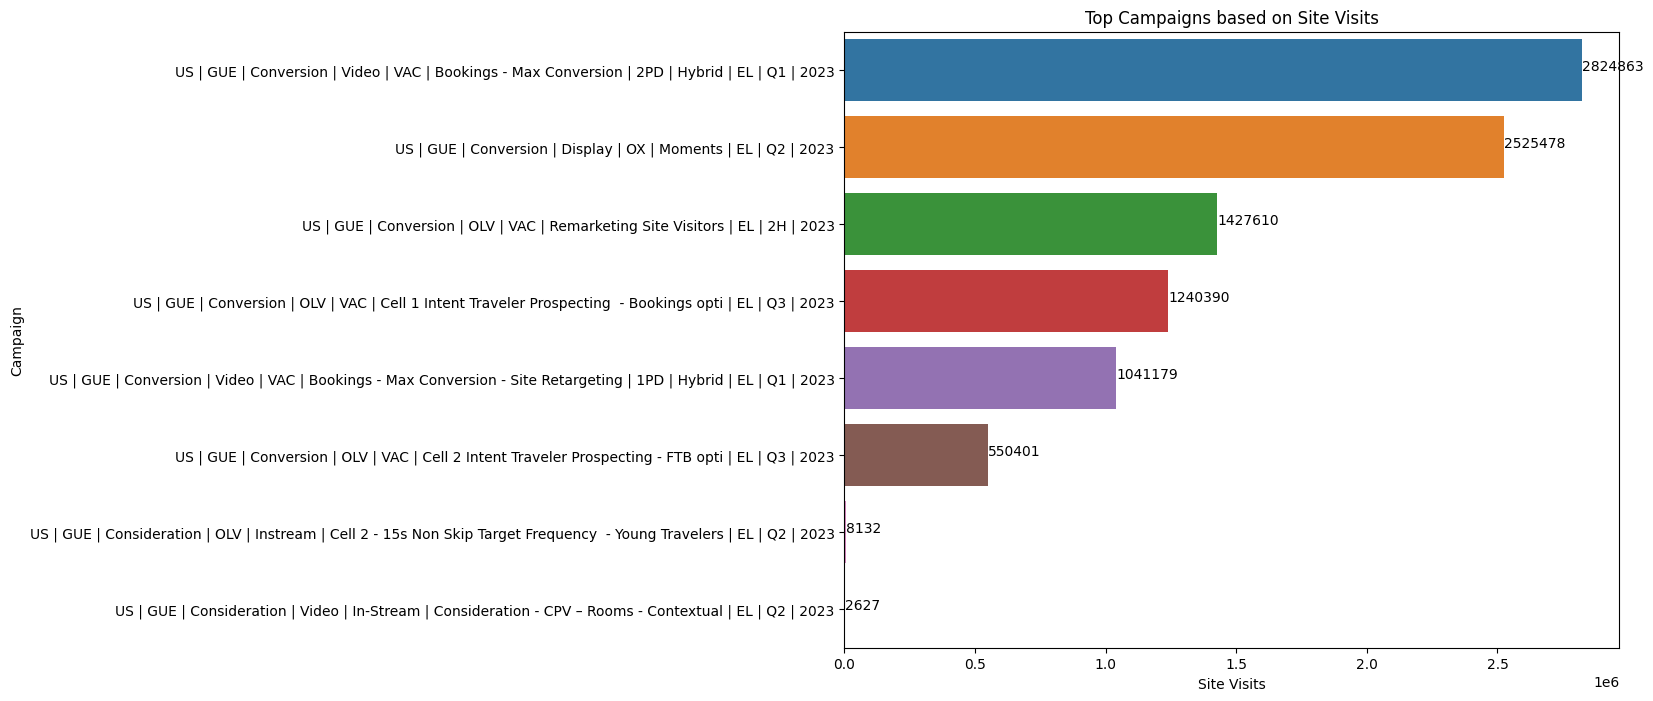

In [27]:
# Group the data by 'Campaign' and calculate the sum for site visits
campaign_analysis = data.groupby('Campaign')['Site Visits'].sum().reset_index()

# Sort the campaigns based on site visits in descending order to get top-performing campaigns
campaign_analysis = campaign_analysis.sort_values(by='Site Visits', ascending=False)

# Visualize the data
plt.figure(figsize=(10,8))
plot = sns.barplot(x='Site Visits', y='Campaign', data=campaign_analysis.head(10))  # Adjust to display top N campaigns

plt.title('Top Campaigns based on Site Visits')
plt.xlabel('Site Visits')
plt.ylabel('Campaign')

# Adding the text labels in each bar
for index, value in enumerate(campaign_analysis['Site Visits'].head(10)):
    plt.text(value, index, f'{value:.0f}')

plt.show()

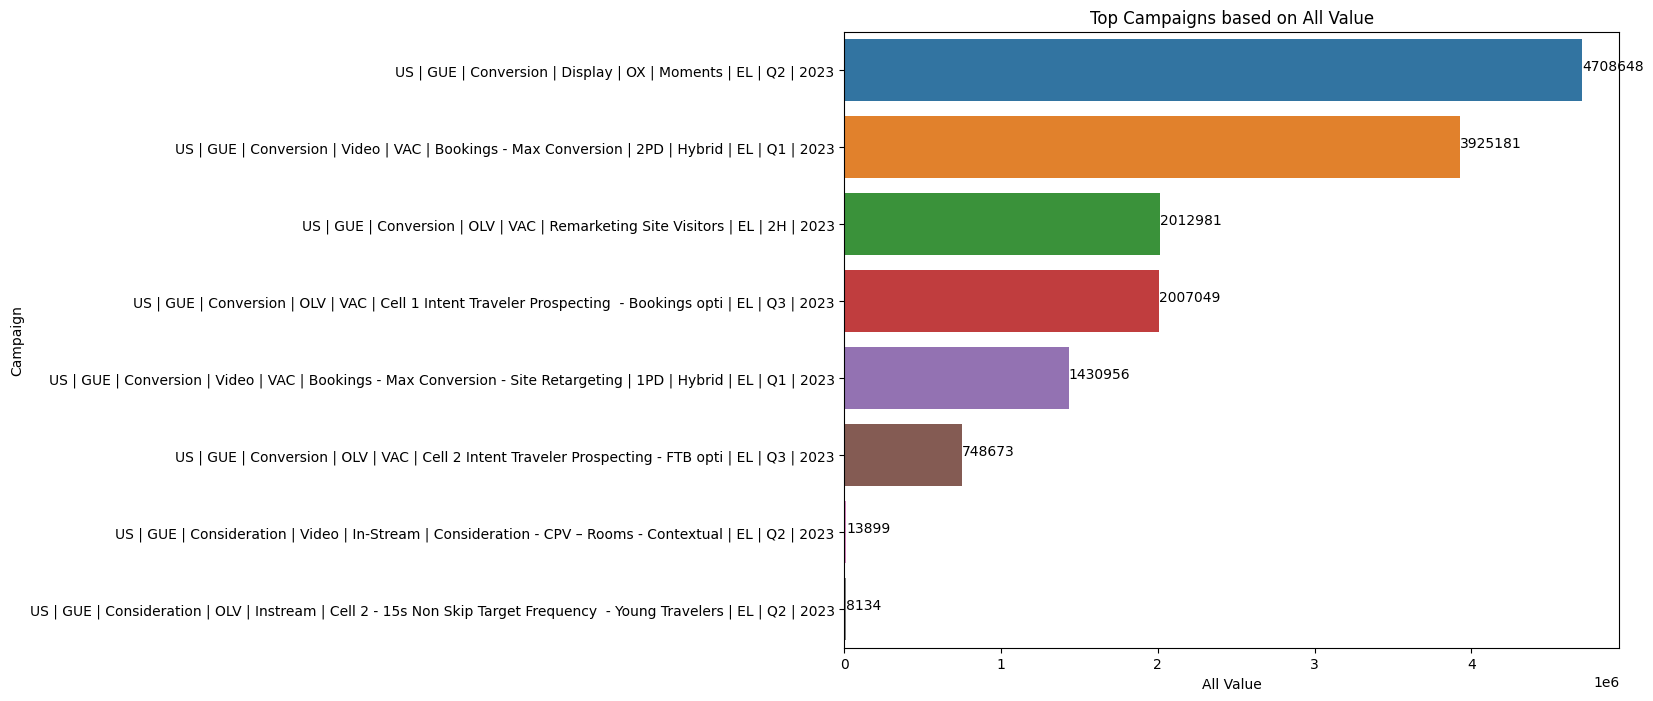

In [30]:
# Group the data by 'Campaign' column and calculate the sum for 'All Value'
campaign_analysis_all_value = data.groupby('Campaign')['All Value'].sum().reset_index()

# Sort the data to get the top campaigns based on 'All Value'
campaign_analysis_all_value = campaign_analysis_all_value.sort_values(by='All Value', ascending=False)

# Visualize the top campaigns based on 'All Value' using a bar plot
plt.figure(figsize=(10,8))
sns.barplot(x='All Value', y='Campaign', data=campaign_analysis_all_value.head(10))  # Adjust to display top N campaigns

plt.title('Top Campaigns based on All Value')
plt.xlabel('All Value')
plt.ylabel('Campaign')

# Adding the text labels in each bar
for index, value in enumerate(campaign_analysis_all_value['All Value'].head(10)):
    plt.text(value, index, f'{value:.0f}')

plt.show()

# Compare creatives


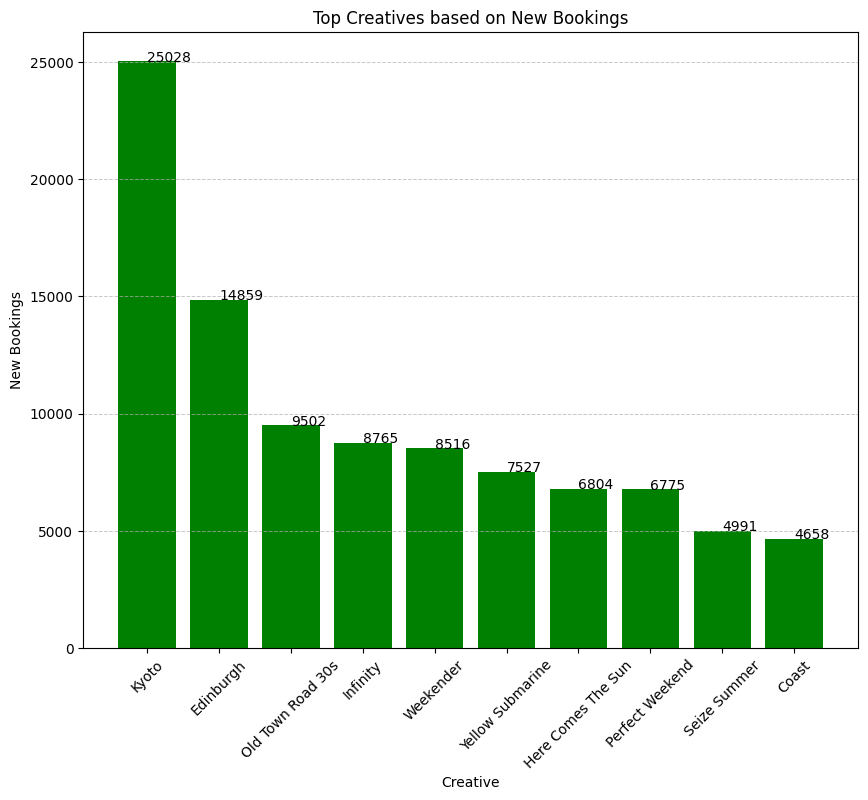

In [33]:
# Group the data by 'Creative' column and calculate the sum for 'New Bookings'
creative_analysis_new_bookings = data.groupby('Creative')['New Bookings'].sum().reset_index()

# Sort the data to get the top creatives based on 'New Bookings'
creative_analysis_new_bookings = creative_analysis_new_bookings.sort_values(by='New Bookings', ascending=False)

# Visualize the top creatives using a vertical bar chart
plt.figure(figsize=(10,8))
plt.bar(creative_analysis_new_bookings['Creative'].head(10), creative_analysis_new_bookings['New Bookings'].head(10), color='green')

plt.title('Top Creatives based on New Bookings')
plt.xlabel('Creative')
plt.ylabel('New Bookings')

# Adding the text labels on top of each bar
for index, value in enumerate(creative_analysis_new_bookings['New Bookings'].head(10)):
    plt.text(index, value + 0.5, f'{value:.0f}')

plt.xticks(rotation=45)  # Rotating the x labels to make them readable
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

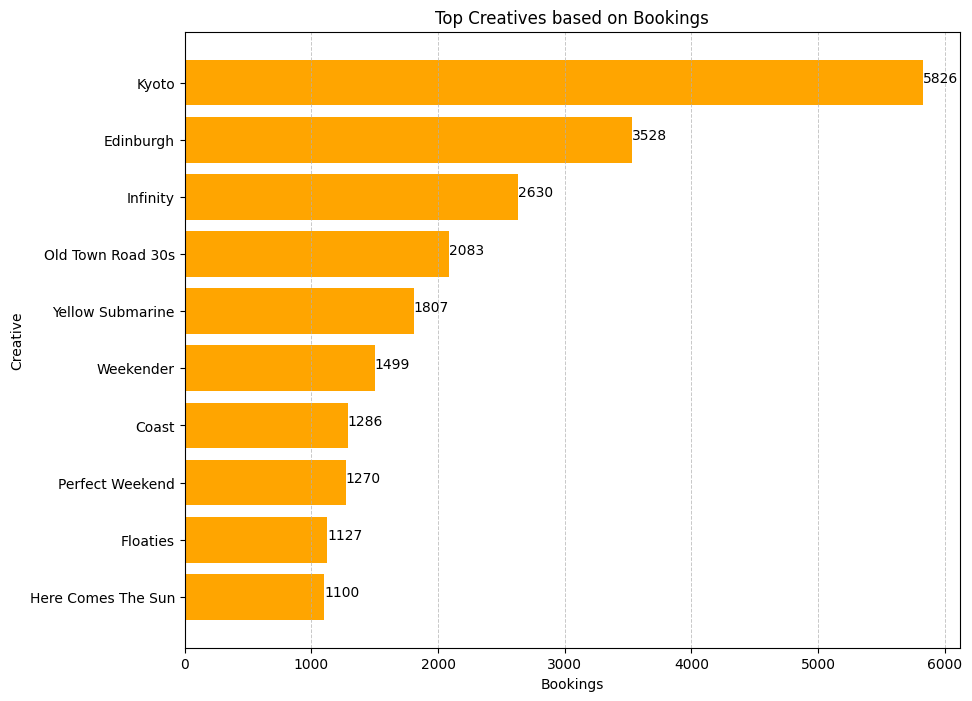

In [37]:
# Group the data by 'Creative' column and calculate the sum for 'Bookings'
creative_analysis_bookings = data.groupby('Creative')['Bookings'].sum().reset_index()

# Sort the data to get the top creatives based on 'Bookings'
creative_analysis_bookings = creative_analysis_bookings.sort_values(by='Bookings', ascending=False)

# Visualize the top creatives using a horizontal bar chart
plt.figure(figsize=(10,8))
plt.barh(creative_analysis_bookings['Creative'].head(10), creative_analysis_bookings['Bookings'].head(10), color='orange')

plt.title('Top Creatives based on Bookings')
plt.ylabel('Creative')
plt.xlabel('Bookings')

# Adding the text labels on top of each bar
for index, value in enumerate(creative_analysis_bookings['Bookings'].head(10)):
    plt.text(value + 0.5, index, f'{value:.0f}')

plt.gca().invert_yaxis()  # This inverts the y-axis to have the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

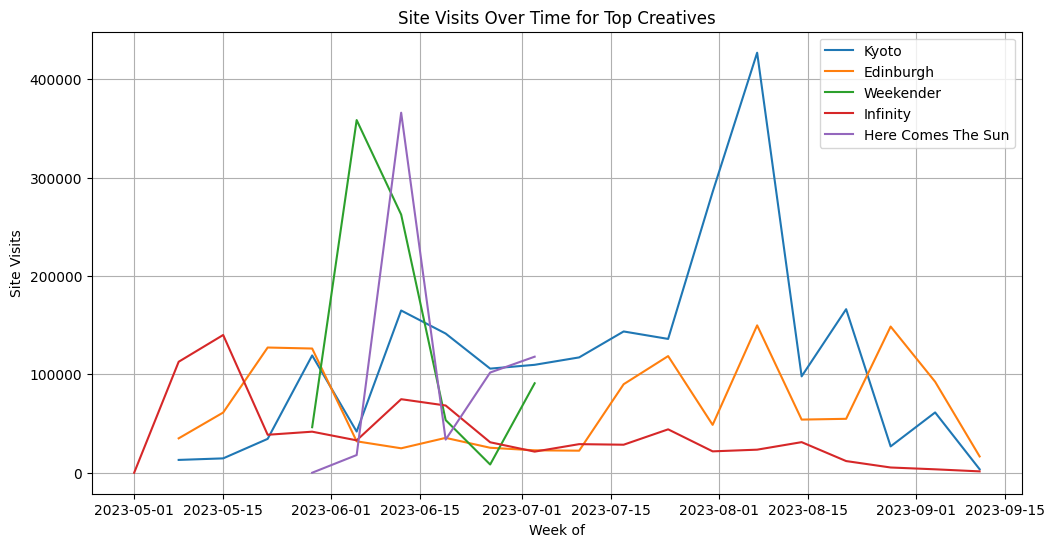

In [38]:
# Group the data by 'Week of' and 'Creative' and calculate the sum for 'Site Visits'
weekly_creative_data = data.groupby(['Week of', 'Creative'])['Site Visits'].sum().reset_index()

# Identify top creatives over the entire time period
top_creatives = weekly_creative_data.groupby('Creative')['Site Visits'].sum().nlargest(5).index.tolist()

# Filter data to include only top creatives
top_creative_data = weekly_creative_data[weekly_creative_data['Creative'].isin(top_creatives)]

# Plotting
plt.figure(figsize=(12, 6))

for creative in top_creatives:
    creative_data = top_creative_data[top_creative_data['Creative'] == creative]
    plt.plot(creative_data['Week of'], creative_data['Site Visits'], label=creative)

plt.xlabel('Week of')
plt.ylabel('Site Visits')
plt.title('Site Visits Over Time for Top Creatives')
plt.legend()
plt.grid(True)
plt.show()

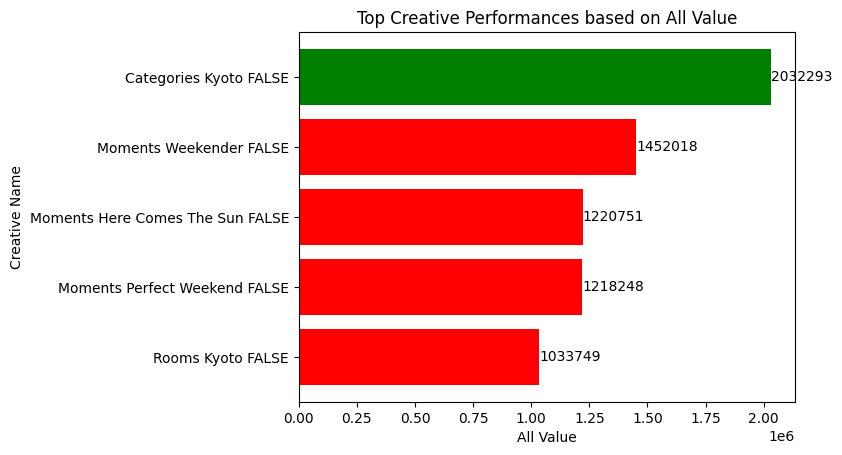

In [44]:
# Step 1: Group data by 'Creative Name' and sum the 'All Value' column
creative_value_sum = data.groupby('Creative Name')['All Value'].sum().reset_index()

# Step 2: Get top N creatives (let's say top 5 for this example)
top_n = 5
top_creatives = creative_value_sum.nlargest(top_n, 'All Value')

# Step 3: Plot horizontal bar chart with colors
colors = ['red'] * top_n
colors[-1] = 'green'  # Top performer in green
top_creatives.sort_values('All Value', inplace=True)  # Sorting in ascending order
plt.barh(top_creatives['Creative Name'], top_creatives['All Value'], color=colors)

# Step 4: Annotate each bar with the exact value
for index, value in enumerate(top_creatives['All Value']):
    plt.text(value, index, f'{value:.0f}', va='center')

# Setting labels and title
plt.xlabel('All Value')
plt.ylabel('Creative Name')
plt.title('Top Creative Performances based on All Value')

# Display the plot
plt.show()

#Insights and Recommendations for campaign


---



#Insights:

The campaign "US | GUE | Conversion | Display | OX | Moments. | EL | Q2 | 2023.." has the highest "All Value" metric, indicating it might be the most valuable campaign in terms of overall value generated.


The campaign "US | GUE | Conversion | Video | VAC | Bookings. - Max Conversion | 2PD | Hybrid | EL | Q1 | 2023.." has the highest "New Bookings" and "Site Visits", suggesting it is effective in attracting new customers and driving traffic to the site.


#Recommendations:

Consider allocating more budget to the campaigns with the highest "All Value" to maximize the overall value generated from the campaigns, which is
"US | GUE | Conversion | Display | OX | Moments. | EL | Q2 | 2023.."

To increase the number of new bookings, focus on optimizing the "US | GUE | Conversion | Video | VAC | Bookings..." campaign, as it has the highest number of new bookings.




# Insights and Recommendations for creative


#Insights

kyoto, edinburgh, oldtown road 30s give the most new bookings.

kyoto, edinburgh, infinity give the most booking.

For all values, kyoto gives the highest number of dollars.



#Recommendations:


Consider giving more budget to the Categories Kyoto to maximize the value generated from the creative.

To increase the number of new bookings, optimize on Kyoto, Edinburgh, and oldtown road 30s.
